# Eksperiment 2 - realni procesi sa realnim merenjima

Na osnovu procesa opisanog merenjima sa senzora A predvideti ponašanje u trenutku t


In [1]:
import numpy as np
import random

x = np.arange(1, 5, 0.1)
E = np.zeros((len(x), 3), dtype='float32')

err = 0.2
yt = np.sin(x)

y = yt+2*err*np.random.rand(len(x))-err

E[:,0] = x
E[:,1] = y
E[:,2] = yt

Obucavajuci skup
- ulaz: interval 1,5 korak::0.1
- izlaz: zasumljeni sin

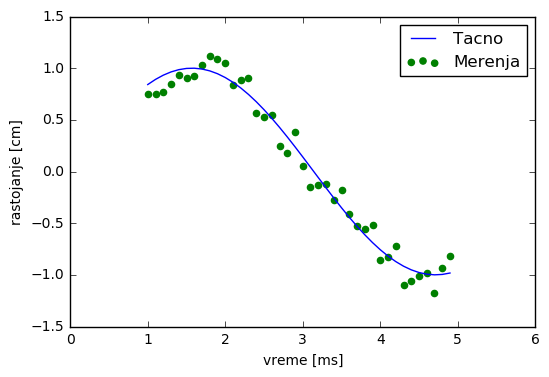

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(E[:, 0], E[:, 1], color='g', label='Merenja')
plt.plot(E[:, 0], yt, color='b', label='Tacno')
plt.xlabel('vreme [ms]')
plt.ylabel('rastojanje [cm]')
plt.legend();


In [3]:
from keras.models import Sequential
from keras.layers.core import Activation, Dense
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(10, input_dim=1))
model.add(Activation('tanh'))
model.add(Dense(10))
model.add(Activation('tanh'))
model.add(Dense(10))
model.add(Activation('tanh'))
model.add(Dense(1))
model.add(Activation('tanh'))

Using Theano backend.


In [4]:
sgd = SGD(lr=0.01, decay=0.0000001, momentum=0.7)
model.compile(loss='mean_squared_error', optimizer=sgd)

In [5]:
training = model.fit(E[:,0:1], E[:,1], nb_epoch=5000, 
                    batch_size=40, verbose=0)
print training.history['loss'][-1]

0.0200012512505


In [6]:
t = model.predict(E[:,0:1], verbose=0)

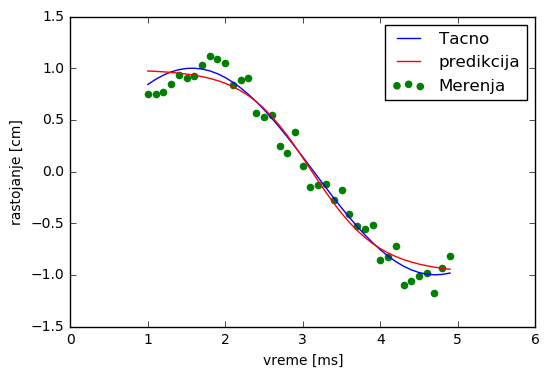

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(E[:, 0], E[:, 1], color='g', label='Merenja')
plt.plot(E[:, 0], yt, color='b', label='Tacno')
plt.plot(E[:, 0], t, color='r', label='predikcija')
plt.xlabel('vreme [ms]')
plt.ylabel('rastojanje [cm]')
plt.legend();


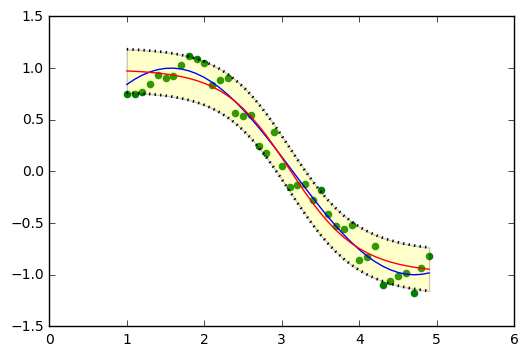

In [8]:

std = 0.0110137434676
std = 2*np.sqrt(std)
std_top = t+std
std_btm = t-std

plt.scatter(E[:, 0], E[:, 1], color='g', label='Merenja')
plt.plot(E[:, 0], yt, color='b', label='Tacno')
plt.plot(E[:, 0], t, color='r', label='predikcija')

plt.plot(E[:, 0], t+std, linestyle=':', color='k', lw=2)
plt.plot(E[:, 0], t-std, linestyle=':', color='k', lw=2)
plt.fill_between(E[:, 0], std_btm[:,0], std_top[:,0], facecolor='yellow', alpha=0.2);
